# Wizualizacja danych z Pandas, Matplotlib i Seaborn

## 1. Import bibliotek

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Ustawienia dla czytelności wykresów
plt.rcParams.update({'font.size': 12})
sns.set_style("whitegrid")  # Styl seaborn

## 2. Przygotowanie danych przykładowych

In [ ]:
# Dane o populacji stanów
data = {
    "state": ["Ohio", "Ohio", "Ohio", "Nevada", "Nevada", "Nevada"],
    "year": [2000, 2001, 2002, 2001, 2002, 2003],
    "pop": [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]
}

frame = pd.DataFrame(data)
print("Pierwsze 5 wierszy:")
frame.head()

Pierwsze 5 wierszy:


,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9


### Podstawowe operacje na DataFrame

In [ ]:
# Wybór kolumny
print("Kolumna 'state':")
print(frame['state'])

# Wybór wielu kolumn
print("\nWybrane kolumny:")
print(frame[["state", "pop"]])

# Wybór wiersza po indeksie
print("\nWiersz o indeksie 1:")
print(frame.loc[1])

Kolumna 'state':
0      Ohio
1      Ohio
2      Ohio
3    Nevada
4    Nevada
5    Nevada
Name: state, dtype: object

Wybrane kolumny:
    state  pop
0    Ohio  1.5
1    Ohio  1.7
2    Ohio  3.6
3  Nevada  2.4
4  Nevada  2.9
5  Nevada  3.2

Wiersz o indeksie 1:
state    Ohio
year     2001
pop       1.7
Name: 1, dtype: object


### Filtrowanie danych

In [ ]:
# Filtracja - tylko Ohio
ohio_data = frame[frame['state'] == 'Ohio']
print("Dane dla Ohio:")
print(ohio_data)

# Filtracja złożona - Ohio w latach 2001-2002
ohio_filtered = frame[(frame['state'] == 'Ohio') & (frame['year'].isin([2001, 2002]))]
print("\nOhio w latach 2001-2002:")
print(ohio_filtered)

Dane dla Ohio:
  state  year  pop
0  Ohio  2000  1.5
1  Ohio  2001  1.7
2  Ohio  2002  3.6

Ohio w latach 2001-2002:
  state  year  pop
1  Ohio  2001  1.7
2  Ohio  2002  3.6


In [ ]:
# Zapisywanie DataFrame do CSV
frame.to_csv('populacja_stanow.csv', index=False)
print("✓ Dane zapisane do pliku 'populacja_stanow.csv'")

# Wczytywanie z pliku CSV
df_loaded = pd.read_csv('populacja_stanow.csv')
print("\n✓ Dane wczytane z pliku:")
print(df_loaded.head())

✓ Dane zapisane do pliku 'populacja_stanow.csv'

✓ Dane wczytane z pliku:
    state  year  pop
0    Ohio  2000  1.5
1    Ohio  2001  1.7
2    Ohio  2002  3.6
3  Nevada  2001  2.4
4  Nevada  2002  2.9


## 3. WYKRES LINIOWY (Line Plot)

**Zastosowanie:** Przedstawianie zmian w czasie, trendów

### Metoda 1: Matplotlib (podstawowa)

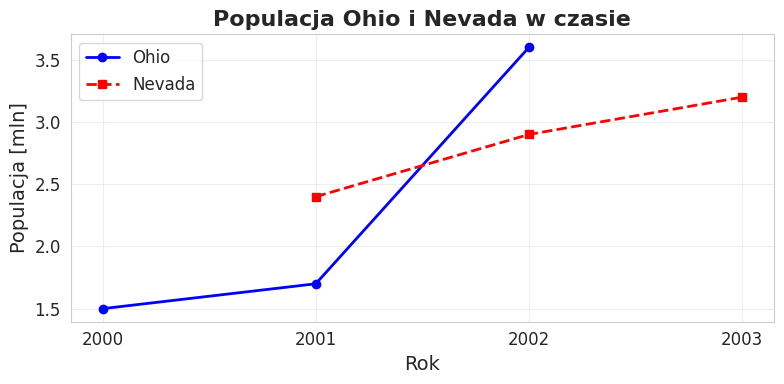

In [ ]:
# Filtracja danych dla każdego stanu
ohio_data = frame[frame['state'] == 'Ohio']
nevada_data = frame[frame['state'] == 'Nevada']

# Tworzenie wykresu
plt.figure(figsize=(8, 4))
plt.plot(ohio_data['year'], ohio_data['pop'],
         marker='o', linestyle='-', linewidth=2,
         color='blue', label='Ohio')
plt.plot(nevada_data['year'], nevada_data['pop'],
         marker='s', linestyle='--', linewidth=2,
         color='red', label='Nevada')

plt.title('Populacja Ohio i Nevada w czasie', fontsize=16, fontweight='bold')
plt.xlabel('Rok', fontsize=14)
plt.ylabel('Populacja [mln]', fontsize=14)
plt.xticks([2000, 2001, 2002, 2003])
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


### Metoda 2: Pandas (wbudowana metoda)

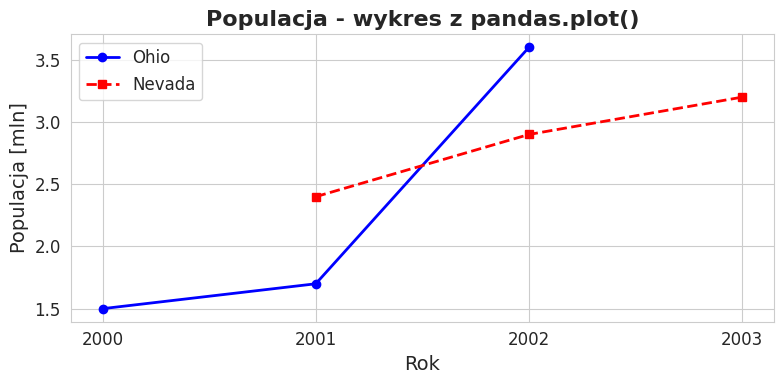

In [ ]:
fig, ax = plt.subplots(figsize=(8, 4))
ohio_data.plot(x='year', y='pop', ax=ax,
               marker='o', color='blue', label='Ohio', linewidth=2)
nevada_data.plot(x='year', y='pop', ax=ax,
                 marker='s', color='red', label='Nevada', linewidth=2, linestyle='--')

ax.set_title('Populacja - wykres z pandas.plot()', fontsize=16, fontweight='bold')
ax.set_xlabel('Rok', fontsize=14)
ax.set_ylabel('Populacja [mln]', fontsize=14)
ax.set_xticks([2000, 2001, 2002, 2003])
ax.legend(fontsize=12)
plt.tight_layout()
plt.show()

### Metoda 3: Seaborn (nowoczesna)

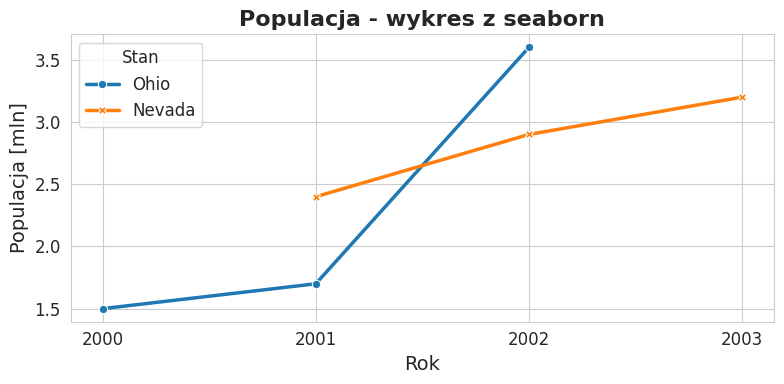

In [ ]:
plt.figure(figsize=(8, 4))
sns.lineplot(data=frame, x='year', y='pop', hue='state',
             style='state', markers=True, dashes=False, linewidth=2.5)

plt.title('Populacja - wykres z seaborn', fontsize=16, fontweight='bold')
plt.xlabel('Rok', fontsize=14)
plt.ylabel('Populacja [mln]', fontsize=14)
plt.xticks([2000, 2001, 2002, 2003])
plt.legend(title='Stan', fontsize=12)
plt.tight_layout()
plt.show()

## 4. WYKRES PUNKTOWY (Scatter Plot)

 **Zastosowanie:** Pokazywanie relacji między dwiema zmiennymi

In [ ]:
# Generowanie dodatkowych danych dla scatter plot
np.random.seed(42)
scatter_data = pd.DataFrame({
    'temperatura': np.random.uniform(15, 35, 50),
    'sprzedaz_lodow': np.random.uniform(50, 300, 50)
})
# Dodajemy korelację
scatter_data['sprzedaz_lodow'] = scatter_data['sprzedaz_lodow'] + scatter_data['temperatura'] * 5

### Scatter plot - Matplotlib

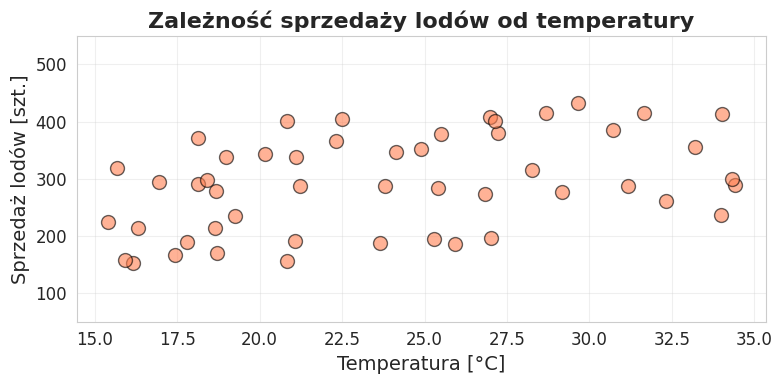

In [ ]:
plt.figure(figsize=(8, 4))
plt.scatter(scatter_data['temperatura'], scatter_data['sprzedaz_lodow'],
            s=100, alpha=0.6, c='coral', edgecolors='black', linewidth=1)

plt.title('Zależność sprzedaży lodów od temperatury', fontsize=16, fontweight='bold')
plt.xlabel('Temperatura [°C]', fontsize=14)
plt.ylabel('Sprzedaż lodów [szt.]', fontsize=14)
plt.ylim([50, 550])
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Scatter plot - Pandas

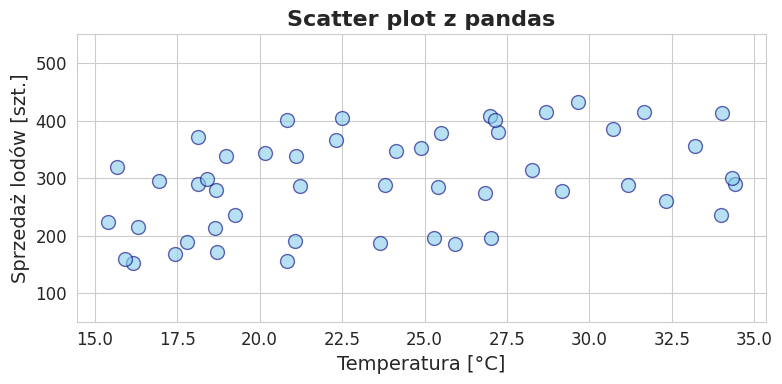

In [ ]:
scatter_data.plot.scatter(x='temperatura', y='sprzedaz_lodow',
                          s=100, alpha=0.6, c='skyblue',
                          edgecolors='navy', figsize=(8, 4))
plt.title('Scatter plot z pandas', fontsize=16, fontweight='bold')
plt.xlabel('Temperatura [°C]', fontsize=14)
plt.ylabel('Sprzedaż lodów [szt.]', fontsize=14)
plt.ylim([50, 550])
plt.tight_layout()
plt.show()

### Scatter plot - Seaborn (z linią trendu)

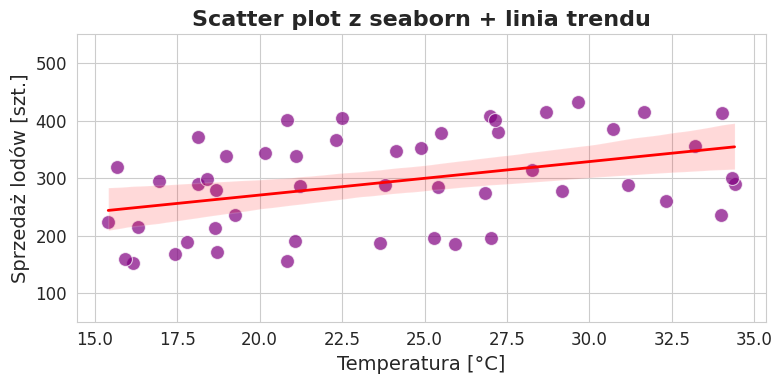

In [ ]:
plt.figure(figsize=(8, 4))
sns.scatterplot(data=scatter_data, x='temperatura', y='sprzedaz_lodow',
                s=100, alpha=0.7, color='purple')
sns.regplot(data=scatter_data, x='temperatura', y='sprzedaz_lodow',
            scatter=False, color='red', line_kws={'linewidth': 2})

plt.title('Scatter plot z seaborn + linia trendu', fontsize=16, fontweight='bold')
plt.xlabel('Temperatura [°C]', fontsize=14)
plt.ylabel('Sprzedaż lodów [szt.]', fontsize=14)
plt.ylim([50, 550])
plt.tight_layout()
plt.show()

## 5. WYKRES SŁUPKOWY (Bar Plot)

 **Zastosowanie:** Porównywanie wartości między kategoriami

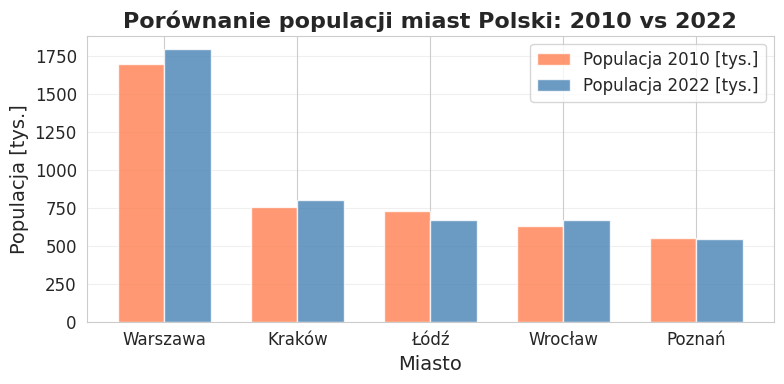

In [ ]:
# Dane dla wykresu słupkowego - populacja miast w dwóch różnych latach
miasta_data = pd.DataFrame({
    'miasto': ['Warszawa', 'Kraków', 'Łódź', 'Wrocław', 'Poznań'],
    'populacja_2022': [1795, 800, 670, 672, 545],
    'populacja_2010': [1700, 757, 730, 632, 550]
})


### Bar plot - Matplotlib

fig, ax = plt.subplots(figsize=(8, 4))
x = np.arange(len(miasta_data['miasto']))
width = 0.35

bars1 = ax.bar(x - width/2, miasta_data['populacja_2010'], width,
               label='Populacja 2010 [tys.]', color='coral', alpha=0.8)
bars2 = ax.bar(x + width/2, miasta_data['populacja_2022'], width,
               label='Populacja 2022 [tys.]', color='steelblue', alpha=0.8)


ax.set_xlabel('Miasto', fontsize=14)
ax.set_ylabel('Populacja [tys.]', fontsize=14)
ax.set_title('Porównanie populacji miast Polski: 2010 vs 2022', fontsize=16, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(miasta_data['miasto'])
ax.legend(fontsize=12)
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


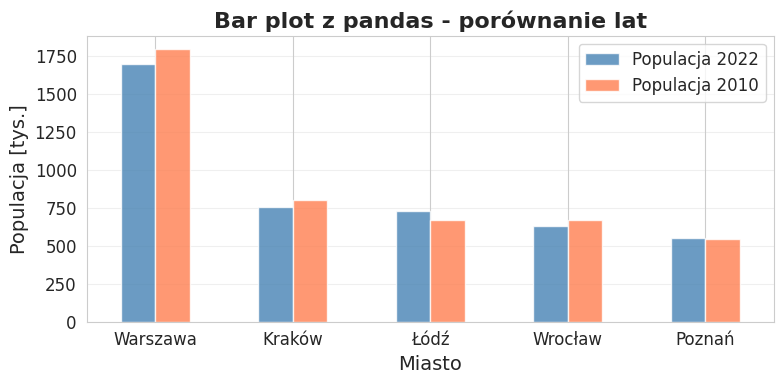

In [ ]:
# Bar plot - Pandas

miasta_data.plot.bar(x='miasto', y=['populacja_2010', 'populacja_2022'],
                     figsize=(8, 4), color=['steelblue', 'coral'], alpha=0.8)
plt.title('Bar plot z pandas - porównanie lat', fontsize=16, fontweight='bold')
plt.xlabel('Miasto', fontsize=14)
plt.ylabel('Populacja [tys.]', fontsize=14)
plt.legend(['Populacja 2022', 'Populacja 2010'], fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

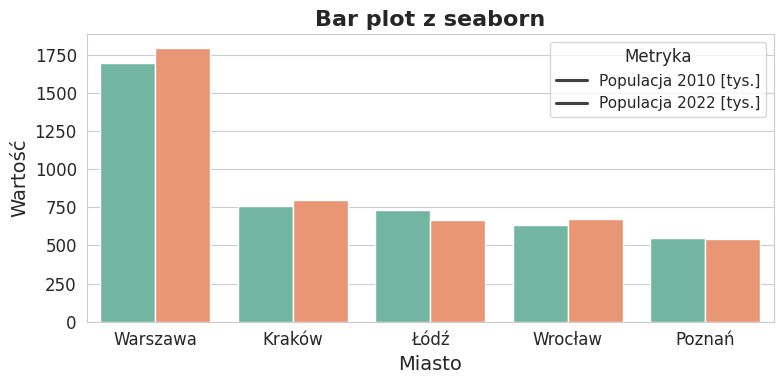

In [ ]:
# Bar plot - Seaborn

# Przekształcenie danych do formatu długiego (long format)
miasta_long = pd.melt(miasta_data, id_vars=['miasto'],
                      value_vars=['populacja_2010', 'populacja_2022'],
                      var_name='Typ', value_name='Wartość')

plt.figure(figsize=(8, 4))
sns.barplot(data=miasta_long, x='miasto', y='Wartość', hue='Typ', palette='Set2')
plt.title('Bar plot z seaborn', fontsize=16, fontweight='bold')
plt.xlabel('Miasto', fontsize=14)
plt.ylabel('Wartość', fontsize=14)
plt.legend(title='Metryka', labels=['Populacja 2010 [tys.]', 'Populacja 2022 [tys.]'], fontsize=11)
plt.tight_layout()
plt.show()

## 💡 Porównanie bibliotek

 | Biblioteka | Zalety | Wady | Kiedy używać |
 |------------|--------|------|--------------|
 | **Matplotlib** | Pełna kontrola, elastyczność | Wymaga więcej kodu | Gdy potrzebna jest precyzyjna kontrola |
 | **Pandas** | Szybkie, wygodne dla DataFrame | Ograniczone opcje stylizacji | Szybka eksploracja danych |
 | **Seaborn** | Piękne wykresy, statystyka | Mniejsza kontrola | Prezentacje, raporty, analiza statystyczna |

# **Rekomendacja:**
 - Rozpocznij od **pandas** dla szybkiej eksploracji
 - Użyj **seaborn** do prezentacji i raportów
 - Sięgnij po **matplotlib** gdy potrzebujesz pełnej kontroli


## 📚 Dodatkowe zasoby

 - [Pandas Documentation](https://pandas.pydata.org/docs/)
 - [Matplotlib Gallery](https://matplotlib.org/stable/gallery/index.html)
  - [Seaborn Gallery](https://seaborn.pydata.org/examples/index.html)
 - [Python Graph Gallery](https://www.python-graph-gallery.com/)



# ZADANIA


## 📝 Zadanie 1: Podstawy DataFrame i wykres liniowy

 **Dane:** Liczba mieszkańców Warszawy i Łodzi w wybranych latach:

 | Rok  | Warszawa  | Łódź      |
 |------|-----------|-----------|
 | 2002 | 1672000   | 789318    |
 | 2011 | 1707000   | 728892    |
 | 2015 | 1740000   | None      |
 | 2022 | 1795000   | 670642    |

**Polecenia:**
1. Utwórz słownik z powyższymi danymi (użyj `None` dla brakujących wartości)
2. Stwórz DataFrame z tego słownika
3. Zapisz DataFrame do pliku `populacja_miast.csv`
4. Wczytaj dane z pliku
5. **Stwórz wykres liniowy** pokazujący zmiany populacji obu miast w czasie
   - Użyj różnych kolorów i markerów dla każdego miasta
    - Dodaj tytuł, opisy osi i legendę
    - Wypróbuj wszystkie 3 metody (matplotlib, pandas, seaborn)




## 📝 Zadanie 2: Wykres punktowy (Scatter)
#
**Polecenia:**
1. Wygeneruj 100 losowych punktów przedstawiających:
    - `godziny_nauki`: losowe liczby od 0 do 10
    - `ocena`: oblicz jako `50 + godziny_nauki * 5 + szum_losowy`
      (gdzie szum to losowe liczby od -10 do 10)
2. Stwórz DataFrame z tymi danymi
3. **Narysuj scatter plot** pokazujący zależność między godzinami nauki a oceną
4. Dodaj linię trendu używając seaborn
5. Dodaj odpowiednie opisy i tytuł

Podpowiedź: użyj np.random.uniform() lub np.random.randint()




## 📝 Zadanie 3: Wykres słupkowy (Bar)

**Dane:** Przeciętne miesięczne wynagrodzenie w wybranych miastach Polski (2023):

 | Miasto    | Wynagrodzenie [PLN] |
 |-----------|---------------------|
 | Warszawa  | 8500                |
 | Kraków    | 7200                |
 | Wrocław   | 7400                |
 | Poznań    | 7100                |
 | Gdańsk    | 6900                |
 | Łódź      | 6300                |

**Polecenia:**
1. Utwórz DataFrame z powyższymi danymi
2. **Stwórz wykres słupkowy poziomy** (barh) pokazujący wynagrodzenia
3. Posortuj miasta od najwyższego do najniższego wynagrodzenia
4. Użyj gradientu kolorów (np. od czerwonego do zielonego)
5. Dodaj wartości na słupkach






Zadanie 1


Pierwsze 5 wierszy:
    Rok  Warszawa      Łódź
0  2002   1672000  789318.0
1  2011   1707000  728892.0
2  2015   1740000       NaN
3  2022   1795000  670642.0

Zapisano do pliku populacja_miast.csv

Dane wczytane z pliku:
    Rok  Warszawa      Łódź
0  2002   1672000  789318.0
1  2011   1707000  728892.0
2  2015   1740000       NaN
3  2022   1795000  670642.0


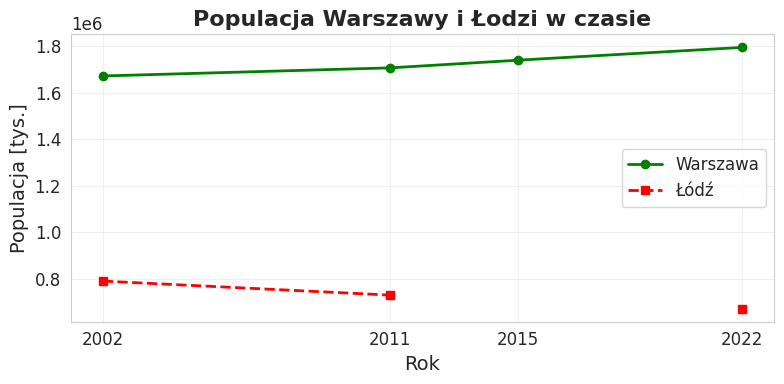

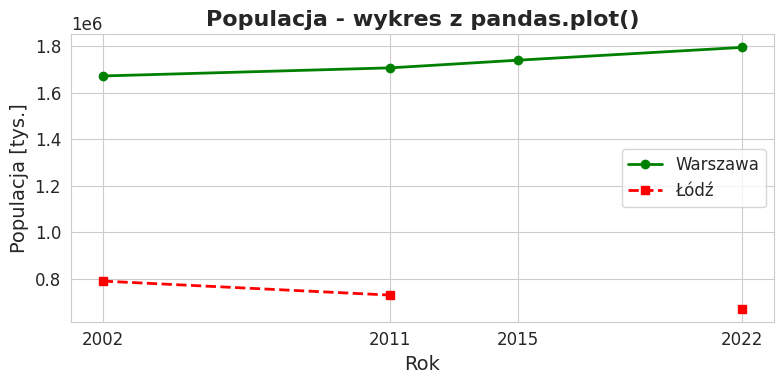

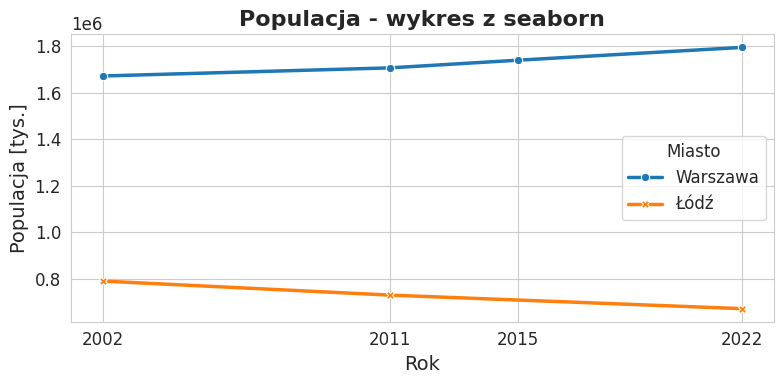

In [ ]:
data = {
    "Rok": [2002, 2011, 2015, 2022],
    "Warszawa": [1672000, 1707000, 1740000, 1795000],
    "Łódź": [789318, 728892, None, 670642]
}

frame  = pd.DataFrame(data)
print("Pierwsze 5 wierszy:")
print(frame.head())

frame.to_csv('populacja_miast.csv', index=False)
print("\nZapisano do pliku populacja_miast.csv")

df_loaded = pd.read_csv('populacja_miast.csv')
print("\nDane wczytane z pliku:")
print(df_loaded.head())

# Metoda 1: Matplotlib
plt.figure(figsize=(8, 4))
plt.plot(frame['Rok'], frame['Warszawa'],
         marker='o', linestyle='-', linewidth=2,
         color='green', label='Warszawa')
plt.plot(frame['Rok'], frame['Łódź'],
         marker='s', linestyle='--', linewidth=2,
         color='red', label='Łódź')

plt.title('Populacja Warszawy i Łodzi w czasie', fontsize=16, fontweight='bold')
plt.xlabel('Rok', fontsize=14)
plt.ylabel('Populacja [tys.]', fontsize=14)
plt.xticks(frame['Rok'])
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Metoda 2: Pandas
fig, ax = plt.subplots(figsize=(8, 4))
frame.plot(x='Rok', y='Warszawa', ax=ax,
               marker='o', color='green', label='Warszawa', linewidth=2)
frame.plot(x='Rok', y='Łódź', ax=ax,
                 marker='s', color='red', label='Łódź', linewidth=2, linestyle='--')

ax.set_title('Populacja - wykres z pandas.plot()', fontsize=16, fontweight='bold')
ax.set_xlabel('Rok', fontsize=14)
ax.set_ylabel('Populacja [tys.]', fontsize=14)
ax.set_xticks(frame['Rok'])
ax.legend(fontsize=12)
plt.tight_layout()
plt.show()

# Metoda 3: Seaborn
frame_long = pd.melt(frame, id_vars=['Rok'],
                      value_vars=['Warszawa', 'Łódź'],
                      var_name='Miasto', value_name='Populacja')

plt.figure(figsize=(8, 4))
sns.lineplot(data=frame_long, x='Rok', y='Populacja', hue='Miasto',
             style='Miasto', markers=True, dashes=False, linewidth=2.5)

plt.title('Populacja - wykres z seaborn', fontsize=16, fontweight='bold')
plt.xlabel('Rok', fontsize=14)
plt.ylabel('Populacja [tys.]', fontsize=14)
plt.xticks(frame['Rok'])
plt.legend(title='Miasto', fontsize=12)
plt.tight_layout()
plt.show()

Zadanie 2

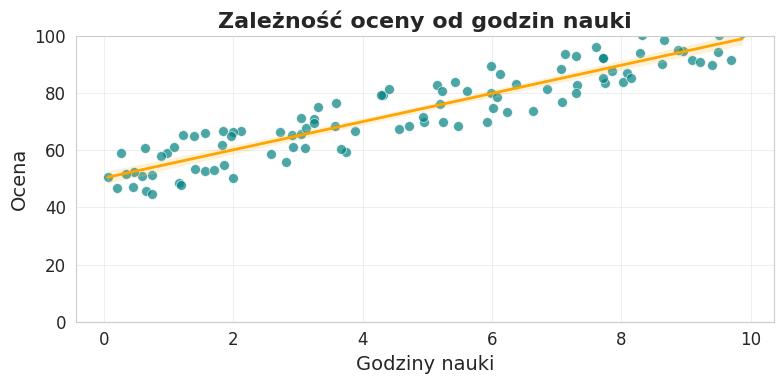

In [ ]:
# 1. 100 losowych punktów
np.random.seed(42)
godziny_nauki = np.random.uniform(0, 10, 100)
szum_losowy = np.random.uniform(-10, 10, 100)
ocena = 50 + godziny_nauki * 5 + szum_losowy

# 2. DataFrame z danymi
scatter_task_data = pd.DataFrame({
    'godziny_nauki': godziny_nauki,
    'ocena': ocena
})

# 3. Rysowanie scatter plot
plt.figure(figsize=(8, 4))
sns.scatterplot(data=scatter_task_data, x='godziny_nauki', y='ocena',
                s=50, alpha=0.7, color='teal')

# 4. Linia trendu używając seaborn
sns.regplot(data=scatter_task_data, x='godziny_nauki', y='ocena',
            scatter=False, color='orange', line_kws={'linewidth': 2})

# 5. Odpowiednie opisy i tytuł
plt.title('Zależność oceny od godzin nauki', fontsize=16, fontweight='bold')
plt.xlabel('Godziny nauki', fontsize=14)
plt.ylabel('Ocena', fontsize=14)
plt.ylim([0, 100]) # Ustawienie sensownego zakresu dla oceny
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Zadanie 3


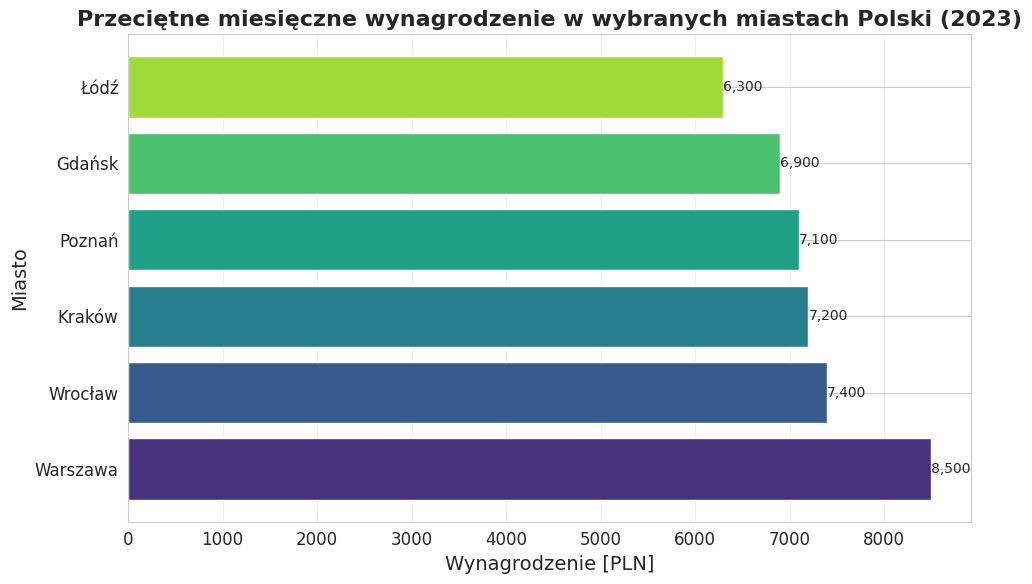

In [ ]:

# 1. DataFrame z powyższymi danymi
miasta_wynagrodzenie_data = pd.DataFrame({
    'Miasto': ['Warszawa', 'Kraków', 'Wrocław', 'Poznań', 'Gdańsk', 'Łódź'],
    'Wynagrodzenie [PLN]': [8500, 7200, 7400, 7100, 6900, 6300]
})

# 3. Posortowane miasta od najwyższego do najniższego wynagrodzenia
miasta_wynagrodzenie_data_sorted = miasta_wynagrodzenie_data.sort_values(
    'Wynagrodzenie [PLN]', ascending=False
)

# 2. Wykres słupkowy poziomy (barh) pokazujący wynagrodzenia
plt.figure(figsize=(10, 6))

# 4. Użycie gradientu kolorów
colors = sns.color_palette("viridis", len(miasta_wynagrodzenie_data_sorted))

bars = plt.barh(miasta_wynagrodzenie_data_sorted['Miasto'],
                miasta_wynagrodzenie_data_sorted['Wynagrodzenie [PLN]'],
                color=colors)

# 5. Dodadnie wartości na słupkach
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():,.0f}',
             va='center', ha='left', fontsize=10)


plt.title('Przeciętne miesięczne wynagrodzenie w wybranych miastach Polski (2023)',
          fontsize=16, fontweight='bold')
plt.xlabel('Wynagrodzenie [PLN]', fontsize=14)
plt.ylabel('Miasto', fontsize=14)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()